In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################
#######################################################################
# Copyright (C)                                                       #
# 2017 Cheung Auyeung(cheung.auyeung@gmail.com)                       #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

# Gambler’s Problem 

A gambler has the opportunity to make bets
on the outcomes of a sequence of coin flips. 

- If the coin comes up heads, he wins as
many dollars as he has staked on that flip; 
- if it is tails, he loses his stake.  

The game ends when the gambler wins by reaching his `GOAL` of \$100, or loses by running out of
money. 

On each flip, the gambler must decide what portion of his capital to stake,
in integer numbers of dollars. This problem can be formulated as an **undiscounted**,
episodic, finite MDP. The state is the gambler’s capital, 

$$ s \in \{1, 2,\ldots, 99\}$$

and the actions are stakes, 

$$a \in \{0, 1,  \ldots \min(s, 100−s) \}.$$ 

The reward is zero on all transitions
except those on which the gambler reaches his goal, when it is +1. 

The state-value function then gives the probability of winning from each state. 

A policy is a mapping
from levels of capital to stakes. The optimal policy maximizes the probability of
reaching the goal. 

Let $p_h$ denote the probability of the coin coming up heads. If $p_h$
is known, then the entire problem is known and it can be solved, for instance, by
value iteration.

Figure 4.3 shows the change in the value function over successive
sweeps of value iteration, and the final policy found, for the case of $p_h$ = 0.4. 

In programming, it is convenient
to introduce two dummy states corresponding to termination with capital of 0 and
100, giving them values of 0 and 1 respectively, so that,
$$ s \in \{0, 1, 2,\ldots, 100\}$$

The value function with the optimal policy is found by the
Bellman optimalality equation for $v_\ast(s)$, 

$$
\begin{align}
v_\ast(s)\, &=\, \underset{a \in A(s)}{\mathrm{argmax}}\, \sum_{s',r} p(s',r\,|\,s,a) \left[ r + \gamma v_\ast(s') \right] \\
{} &=\, 
\begin{cases}
\underset{a\in A(s)}{\mathrm{argmax}}\, \sum_{s'} p(s'\,|\,s,a)\cdot v_\ast(s') & \text{if}\ s \in \{1,\ldots,99\}\\
1, & \text{if },\ s = 100 \\
0, & \text{if },\ s = 0
\end{cases}
\end{align}
$$

where $A(s) = \{0, 1,  \ldots \min(s, 100−s) \}$, $\gamma = 1$, and $r = 0$. In particular, when the next state  is $s' = 100$, the return is,

$$
r + v_\ast(s') = 1, \qquad\text{for } s' = 100. 
$$


For state $s=0$, the reward is $r=0$, and the transition probability is $p(s',r\,|\,s,a) = 1$, so that it shall stay at state $s=0$ with a probability of one to indicate that the probability of winning at $s=0$ is zero, i.e., 

$$
v_\ast(s) = 0,\qquad \text{ if } s=0.
$$

For state $s=100$, the goal is met, and the transition probability is $p(s',r\,|\,s,a) = 1$, so that it shall stay at state $s=100$ with probability one, and the probability of winning at $s=100$ is also one, i.e., 

$$
v_\ast(s) = 1,\qquad \text{ if } s=100.
$$

For state $s\ne100$, an action $a \in A(s)$ (`actions`) has only two possible next states. The next state is either $s' = s+a$ with a probability of $p_h$ (`headProb`) or the next state is $s' = s-a$ with a probability of $1 - p_h$.  Therefore,

$$
v_\ast(s)\, =\, \underset{a\in A(s)}{\mathrm{argmax}}\, \Bigg( p_h \cdot v_\ast(s+a) \,+\, (1-p_h)\cdot v_\ast(s-a) \Bigg), \qquad \text{if } s \in \{0,\dots,99\}.
$$

In this example, the above equation is solved by value interation:
```python
actionReturns = []
for action in actions:
    actionReturns.append(headProb * stateValue[state + action] + \
                        (1 - headProb) * stateValue[state - action])
newValue = np.max(actionReturns)
stateValue[state] = newValue
```
where `actions` is $A(s)$ and `stateValue[state]` is $v(s)$.

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gamblerProblem(headProb=0.4, maxSweep=32, verbose=False) :
    # goal
    GOAL = 100

    # all states, including state 0 and state 100
    states = np.arange(GOAL + 1)

    # optimal policy
    policy = np.zeros(GOAL + 1)

    # state value
    stateValue = np.zeros(GOAL + 1)
    stateValue[GOAL] = 1.0
    
    # create plot
    figsize = (12,8)
    plt.figure(1, figsize=figsize)      

    # value iteration
    sweep = 0
    deltaList = []
    while True:
        delta = 0.0
        for state in states[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            actionReturns = []
            for action in actions:
                actionReturns.append(headProb * stateValue[state + action] + \
                                         (1 - headProb) * stateValue[state - action])
            newValue = np.max(actionReturns)

            delta += np.abs(stateValue[state] - newValue)
            
            # update state value
            stateValue[state] = newValue
        deltaList.append(delta)
 
        if sweep in [0,1,2,3,4,5,128,256,512,1024,2048]:
            plt.plot(stateValue,label='Sweep {}'.format(sweep))
            
        sweep +=1
        if delta < 1e-9 or sweep>= maxSweep:
            break

    # calculate the optimal policy
    for state in states[1:GOAL]:
        # get non-zero possilbe actions for current state
        actions = np.arange(1, min(state, GOAL - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + \
                                 (1 - headProb) * stateValue[state - action])
        # due to tie, can't reproduce the optimal policy in book
        policy[state] = actions[np.argmax(actionReturns)]

        if verbose :
            print("state =", state)
            print("actions = ", actions)
            print("returns for the actions: ", actionReturns)
            print("best action: ",np.argmax(np.array(actionReturns)))
            print("policy[state] = ",policy[state],"\n")

    # figure 4.3
    plt.plot(stateValue,label='Sweep {}'.format(sweep))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.xlim([1,GOAL-1])
    plt.xticks([1,25,50,75,99])
    plt.legend()
    plt.title("State Value function for headProb = {}".format(headProb))
    plt.show()        

    plt.figure(2, figsize=figsize)
    plt.plot(deltaList)
    plt.xlabel('sweep')
    plt.ylabel('delta')
    plt.title("Delta for headProb = {}".format(headProb))
    plt.show()
    
    plt.figure(3, figsize=figsize)
    plt.plot(states, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.xlim([1,GOAL-1])
    plt.xticks([1,25,50,75,99])
    plt.title("Policy for headProb = {}".format(headProb))  
    plt.show()
    
    print("policy[99] =", policy[99])


The policy in Figure 4.3 is optimal, but not unique, all corresponding to ties for the argmax action selection with respect to the optimal. 

Due to ties, can't reproduce the optimal policy in Figure 4.3 of the book. To exam ties, set
```python
verbose = True
```

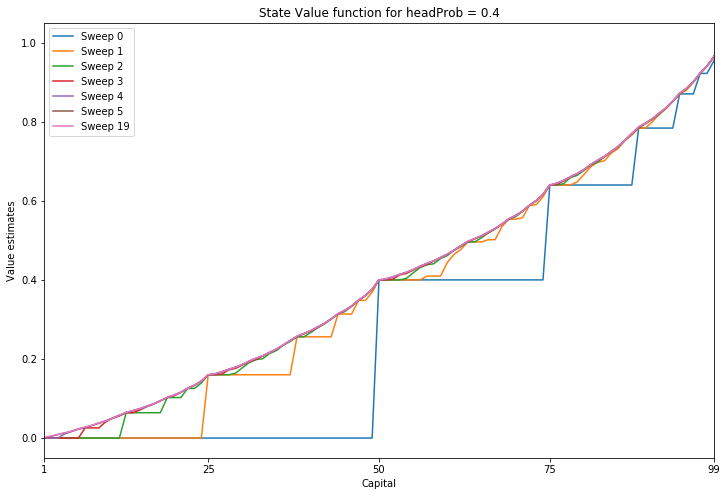

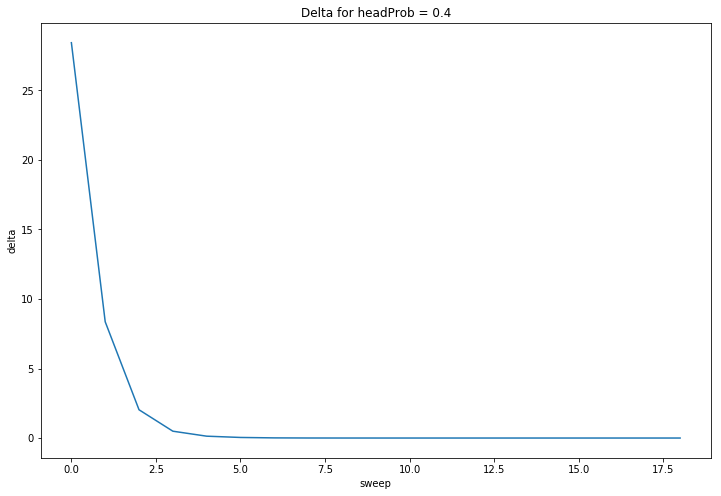

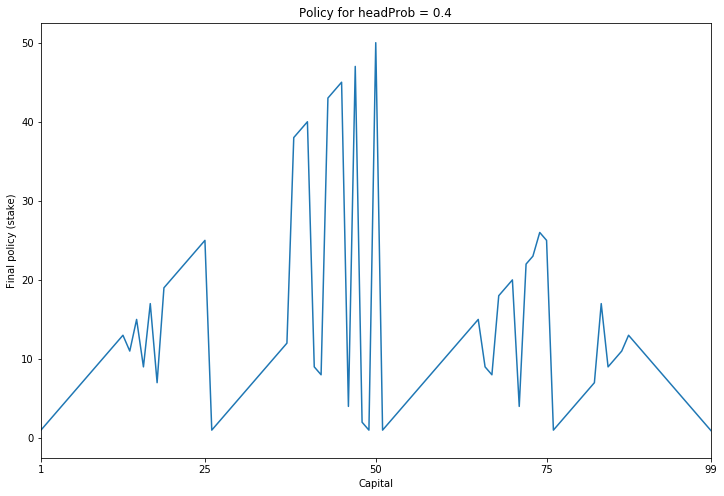

policy[99] = 1.0


In [11]:
# Figure 4.3
gamblerProblem(headProb=0.4,verbose=False)

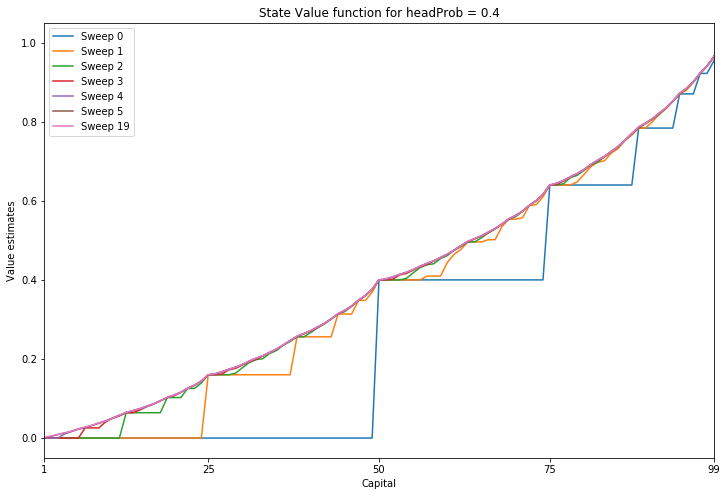

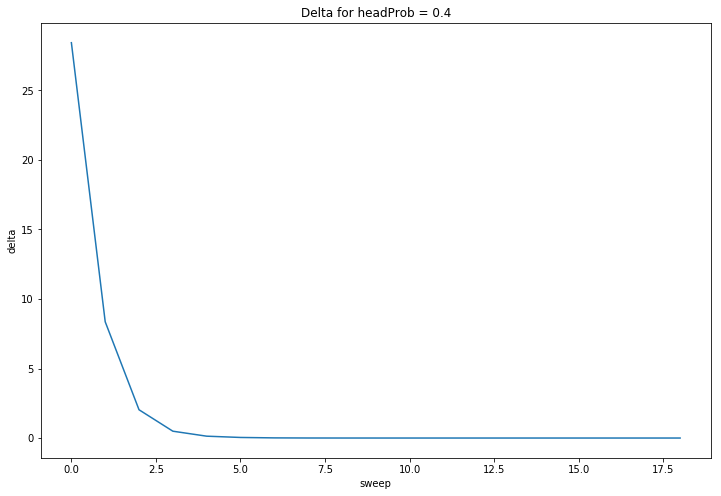

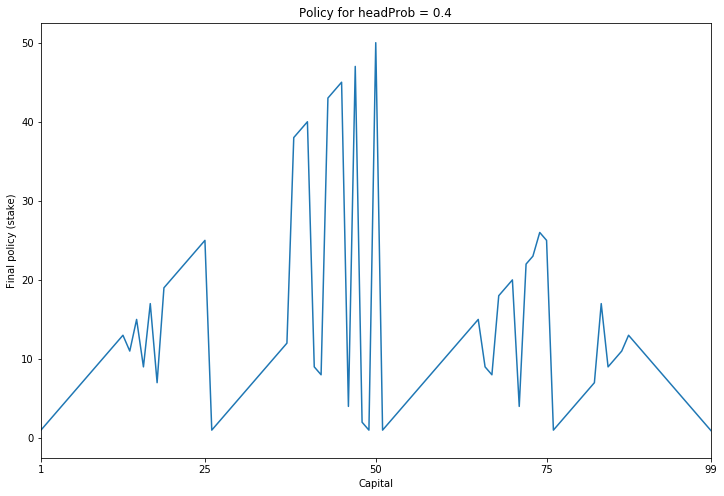

policy[99] = 1.0


In [12]:
# Figure 4.3
gamblerProblem(headProb=0.4,verbose=False)

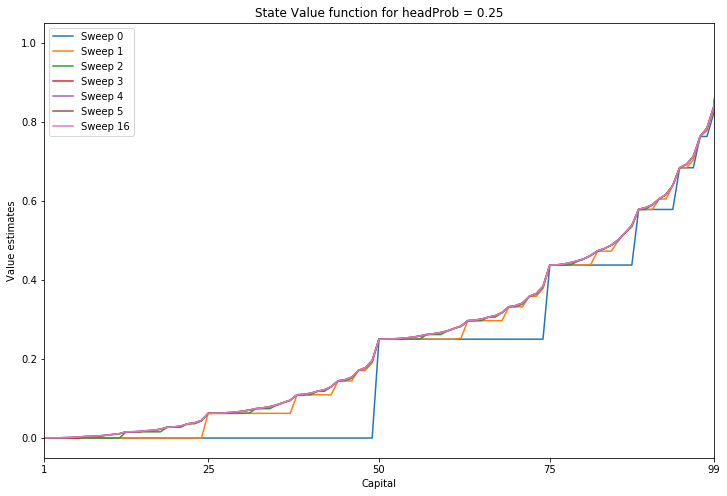

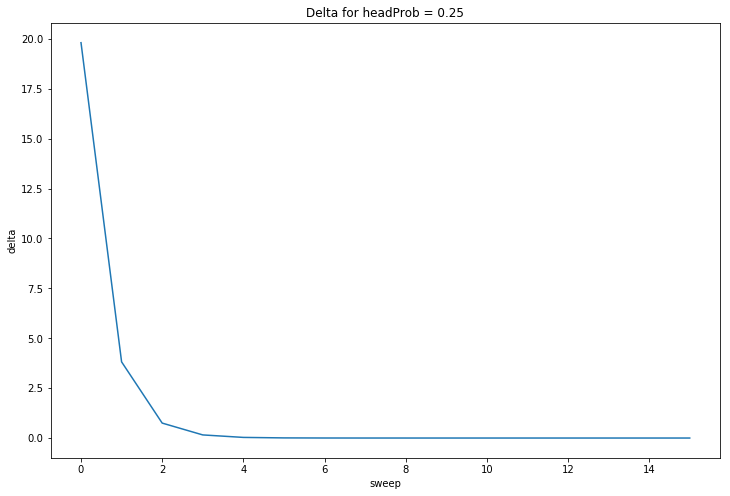

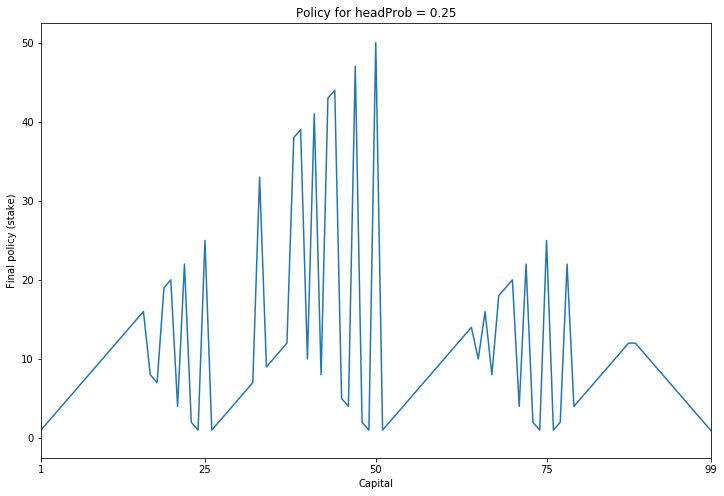

policy[99] = 1.0


In [13]:
# Exercise 4.9
gamblerProblem(headProb=0.25,verbose=False)

state = 1
actions =  [1]
returns for the actions:  [0.18181818119085583]
best action:  0
policy[state] =  1.0 

state = 2
actions =  [1 2]
returns for the actions:  [0.33057851127069404, 0.30353117856983647]
best action:  0
policy[state] =  1.0 

state = 3
actions =  [1 2 3]
returns for the actions:  [0.45229150863508216, 0.43016187279970208, 0.3850084744070838]
best action:  0
policy[state] =  1.0 

state = 4
actions =  [1 2 3 4]
returns for the actions:  [0.55187487014660674, 0.53376880447232944, 0.49682511489167014, 0.43955112707266547]
best action:  0
policy[state] =  1.0 

state = 5
actions =  [1 2 3 4 5]
returns for the actions:  [0.63335216596422272, 0.6185381122385748, 0.58831145713791111, 0.54145092166371456, 0.47606315084103729]
best action:  0
policy[state] =  1.0 

state = 6
actions =  [1 2 3 4 5 6]
returns for the actions:  [0.70001540803503581, 0.68789481862980439, 0.66316391901061911, 0.62482348090628292, 0.57132439570141347, 0.50050508418918715]
best action:  0
policy[s

best action:  0
policy[state] =  1.0 

state = 47
actions =  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
returns for the actions:  [0.99991984463297412, 0.9999166059631992, 0.99990999776700962, 0.99989975304670198, 0.99988545787438809, 0.99986653466763742, 0.99984221885281421, 0.99981152797321649, 0.99977322199385776, 0.99972575319904788, 0.99966720365842821, 0.99959520773484178, 0.99950685650303794, 0.99939858021734418, 0.99926600407952448, 0.99910377147925977, 0.99890532756545503, 0.99866265440377755, 0.99836594701972059, 0.99800321723802532, 0.99755980931196919, 0.99701780777199067, 0.99635531356833928, 0.99554555926099131, 0.99455582750692628, 0.9933461291472826, 0.99186758748376969, 0.99006046346257692, 0.98785174197522907, 0.98515218175318986, 0.98185270966003602, 0.97782001369603533, 0.97289115665470804, 0.96686699280133304, 0.95950412158060738, 0.95050505325074108, 0.939506189095

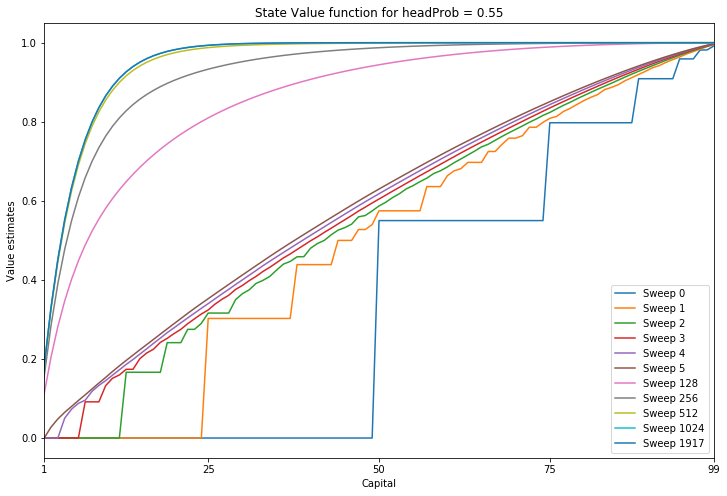

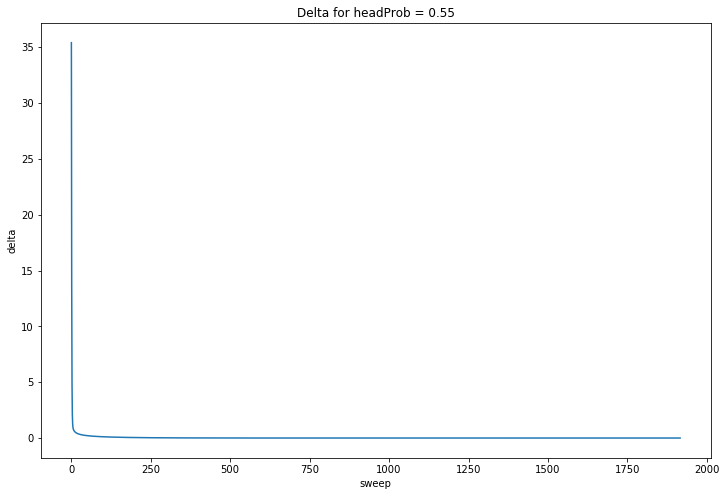

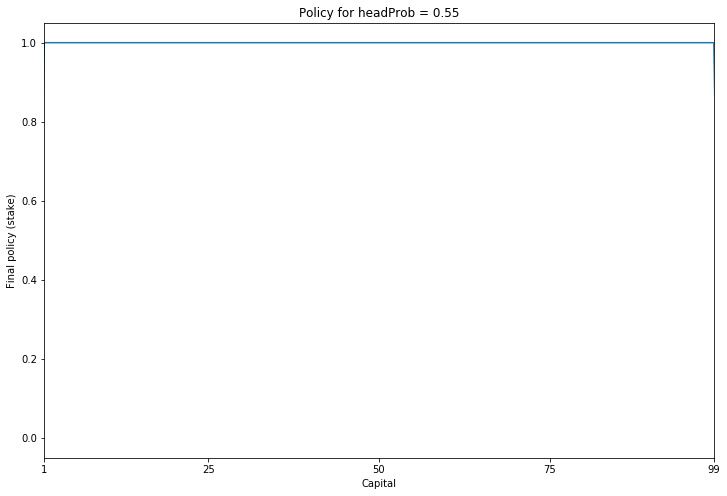

policy[99] = 1.0


In [14]:
# Exercise 4.9
for maxSweep in [2048] :
    gamblerProblem(headProb=0.55,maxSweep=maxSweep,verbose=True)

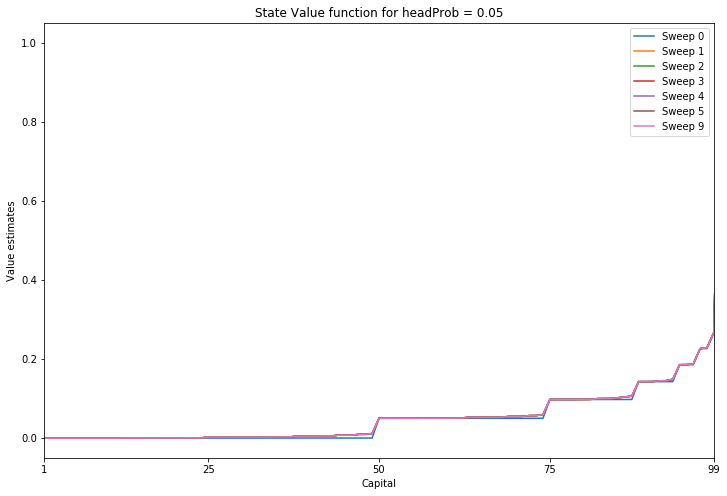

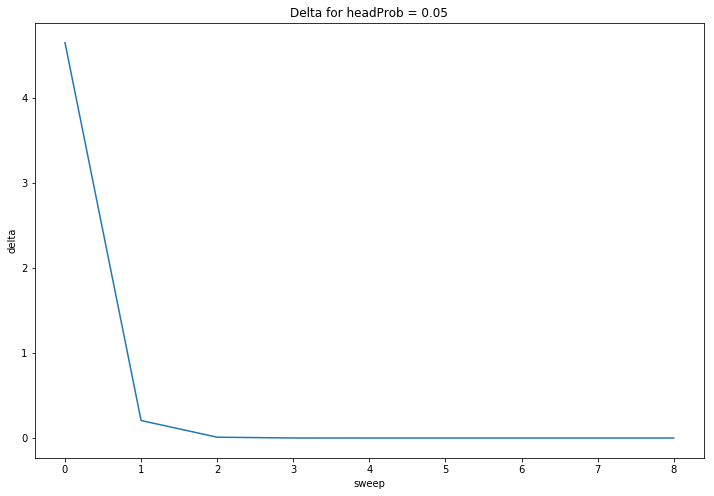

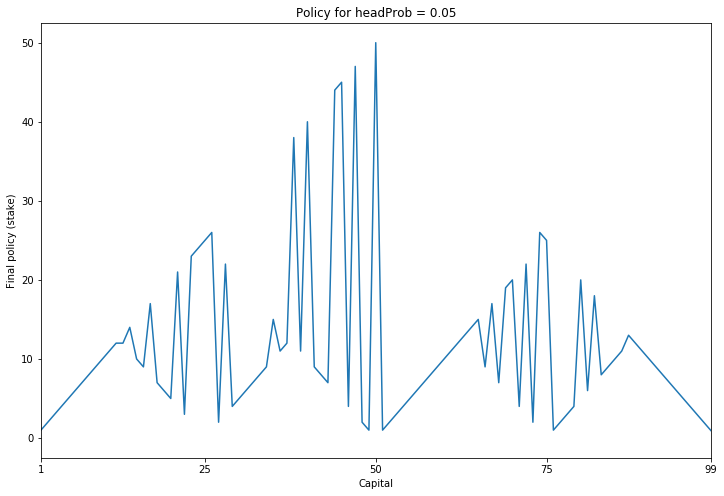

policy[99] = 1.0


In [15]:
# Exercise 4.9
for maxSweep in [32] :
    gamblerProblem(headProb=0.05,maxSweep=maxSweep,verbose=False)